In [1]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
#os.environ['MACOSX_DEPLOYMENT_TARGET'] = '10.9'



In [2]:
x = np.arange(-2,2, 0.05)
bet = 2.5
p = np.exp(bet*x)/(1+np.exp(bet*x))
y = st.binom.rvs(1,p)
p

array([0.00669285, 0.00757724, 0.00857749, 0.00970848, 0.01098694,
       0.01243165, 0.01406363, 0.01590639, 0.01798621, 0.02033235,
       0.02297737, 0.02595736, 0.02931223, 0.03308598, 0.03732689,
       0.04208773, 0.04742587, 0.05340333, 0.06008665, 0.06754669,
       0.07585818, 0.08509905, 0.09534946, 0.10669059, 0.11920292,
       0.13296424, 0.1480472 , 0.16451646, 0.18242552, 0.20181322,
       0.22270014, 0.24508501, 0.26894142, 0.29421497, 0.3208213 ,
       0.34864514, 0.37754067, 0.4073334 , 0.4378235 , 0.46879063,
       0.5       , 0.53120937, 0.5621765 , 0.5926666 , 0.62245933,
       0.65135486, 0.6791787 , 0.70578503, 0.73105858, 0.75491499,
       0.77729986, 0.79818678, 0.81757448, 0.83548354, 0.8519528 ,
       0.86703576, 0.88079708, 0.89330941, 0.90465054, 0.91490095,
       0.92414182, 0.93245331, 0.93991335, 0.94659667, 0.95257413,
       0.95791227, 0.96267311, 0.96691402, 0.97068777, 0.97404264,
       0.97702263, 0.97966765, 0.98201379, 0.98409361, 0.98593

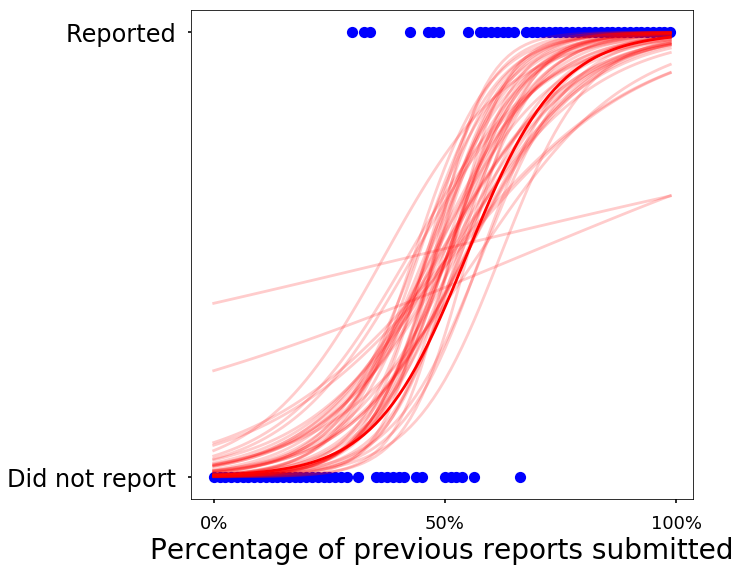

In [8]:
plt.style.use('seaborn-poster')

fig,ax = plt.subplots(figsize=(9,9))

ax.plot(x,y, 'bo')

ax.set_xlabel('Percentage of previous reports submitted', fontsize=28)
plt.yticks([0,1], ['Did not report','Reported'], fontsize=24)
plt.xticks(np.arange(-2,2.1,2),['0%','50%','100%'], fontsize=18)
plt.savefig("regression_blank.pdf")
for n in range(50):
    bet_g = st.norm.rvs(2.5, 0.7)
    a = st.norm.rvs(0,0.5)
    if n == 0:
        alph = 1
    else:
        alph=0.2
    ax.plot(x, np.exp(a+x*bet_g)/(1+np.exp(a+x*bet_g)), alpha=alph, c='r')
    if n in [0,1,20,49]:
        plt.savefig("./figures/regression_n"+str(n)+".pdf")
        

plt.show()

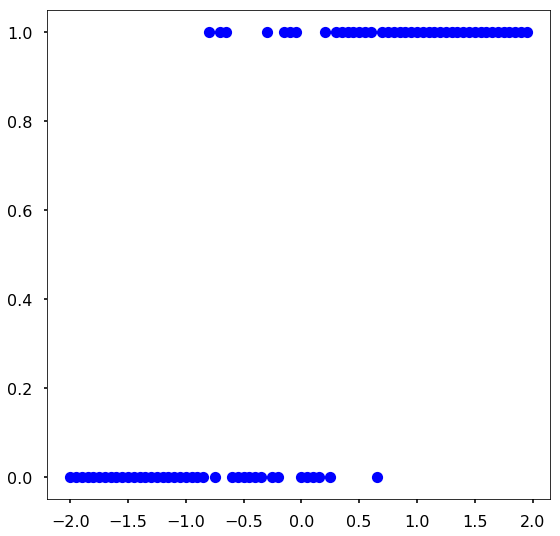

In [9]:


fig,ax = plt.subplots(figsize=(9,9))

ax.plot(x,y, 'bo')

plt.show()

In [17]:
stanmodel = """
data {
    int N; 
    int y[N];
    vector[N] x;
}
parameters {
    real bet;
    real alpha;
}
model {
    bet ~ normal (0,2);
    alpha ~ normal (0,0.5);
    y ~ bernoulli_logit(x*bet+alpha);
}
"""

inputs = {
    'N': len(y),
    'y': y,
    'x': x,
}
sm = pystan.StanModel(model_code=stanmodel)
def init():
    return {'bet':1.2,'alpha':-1}
    
fit = sm.sampling(data=inputs, iter= 200, chains =1, init=init)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4a257b089e7bbc1d30e6d6cf935b0b2f NOW.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:362: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(np.asarray(v).dtype, int):
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:364: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


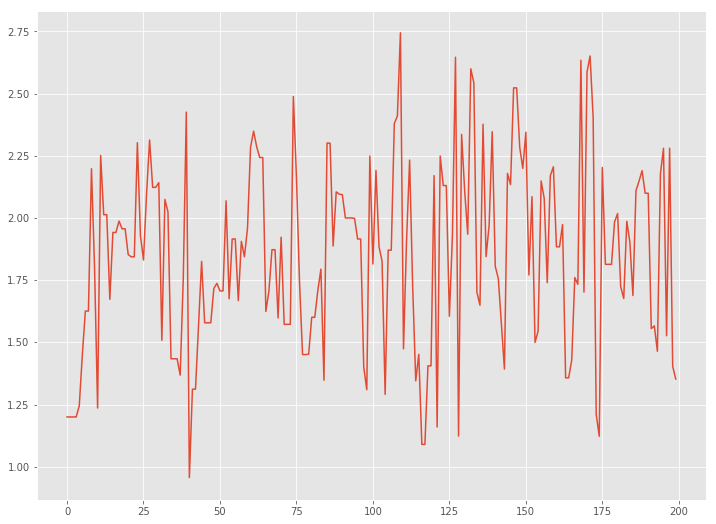

In [18]:
samples = fit.extract(pars=['bet'],permuted=False,inc_warmup=True)
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(samples[:,:,0])
plt.show()

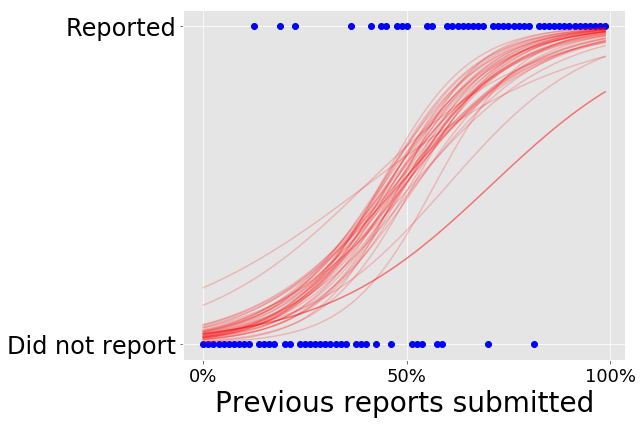

In [19]:
plt.style.use('ggplot')

fig,ax = plt.subplots(figsize=(9,6))

ax.plot(x,y, 'bo')


ax.set_xlabel('Previous reports submitted', fontsize=28, color='black')
plt.yticks([0,1], ['Did not report','Reported'], fontsize=24, color='black')
plt.xticks(np.arange(-2,2.1,2),['0%','50%','100%'], fontsize=18, color = 'black')
plt.tight_layout()
plt.savefig("./figures/regression_blank.pdf")
for n in range(39):
    bet_g = samples[5*n,0,0]
    a = samples[5*n,0,1]
    if n == 0:
        alph = 0.5
    else:
        alph=0.2
    ax.plot(x, np.exp(a+x*bet_g)/(1+np.exp(a+x*bet_g)), alpha=alph, c='r')
    if n in [0,1,20,38]:

        plt.savefig("./figures/regression_n"+str(n)+".pdf")
        

plt.show()

In [19]:
samples[4,0,0]

2.3390241559415204